In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 
import scipy.stats as stats
import math
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [2]:
ppt = pd.read_csv('pt.csv')
ppt = np.array(ppt['seq'].values)
symbols = "[-],"
for i in range(len(ppt)):
    for sb in symbols:
        ppt[i] = ppt[i].replace(sb,'')
    ppt[i] = ppt[i].upper()


In [3]:
def sliceppt(array,num):
    slice_array = []
    for ppt in array:
        if len(ppt)> num:
            length = len(ppt)
            overlength = length - num + 1
            for i in range(0,overlength):
                slice_array.append(ppt[i:num+i])
                slice_array.append(ppt[len(ppt)-num -overlength + i:len(ppt)-overlength + i])
        elif len(ppt) == num:
            slice_array.append(ppt)
    myset = set(slice_array)
    for i in myset:
        if len(i) != num:
            emptyitem = i
    myset.remove(emptyitem)
    
            
            
    return list(myset)
            

In [12]:
def AAtoNUM_1(array):
    num = len(array[0])
    AAnumlist=[]
    for i in range(len(array)):
        stringNUM = ''
        for j in range(0,num):
            AAstr = array[i]
            
            AA = AAstr[j]
            if AA == 'D' or AA =='E':
                stringNUM += "1"
            elif AA == 'N' or AA =='Q':
                stringNUM += '2'
            elif AA == 'F' or AA =='W' or AA == 'Y':
                stringNUM += '3'
            elif AA == 'H' or AA == 'K'or AA == 'R' :
                stringNUM += '4'
            elif AA == 'A' or AA =='I' or AA =='L' or AA =='M' or AA =='V':
                stringNUM += '5'
            elif AA == AA =='G' or AA =='P':
                stringNUM += '6'
            elif AA == 'S' or AA == 'T':
                stringNUM += '7'
            elif AA == 'C':
                stringNUM += '8'
            #else:
                #stringNUM  += '0'
        if len(stringNUM) == num:
            AAnumlist.append(stringNUM) 
    
    return AAnumlist

def AAtoNUM_2(array):
    
    num = len(array[0])
    AAnumlist=[]
    for i in range(len(array)):
        stringNUM = ''
        for j in range(0,num):
            AAstr = array[i]
            
            AA = AAstr[j]
            if AA == 'A' or AA =='R' or AA == "G":
                #10-100
                stringNUM += "2"
            elif AA == 'V' or AA == 'S' or AA == 'W' or AA == 'F' or AA == 'M' or AA == 'L' or AA == 'I' or AA == 'H' or AA == 'Q' or AA == 'N':
                #1-10
                stringNUM += '1'
            elif AA == 'C' or AA == 'K'or AA == 'P' or AA == 'T':
                #100 and above
                stringNUM += '3'
            elif AA =='Y' or AA == 'E' or AA =='D':
                #less than 1
                stringNUM += '0'
        if len(stringNUM) == num:
            AAnumlist.append(stringNUM) 
    
    return AAnumlist

In [13]:
def ordercheck(array):
    ordered = True
    length = len(array[0])
    wrong = []
    for i in array:
        if len(i) != length:
            ordered = False
            wrong.append(i)
    
    if ordered == False:
        return wrong
    else:
        return 'All ordered'
    
            

In [16]:
slice_array10 = sliceppt(ppt,10)
slice_array9 = sliceppt(ppt,9)
num_slice_array10_1 = AAtoNUM_1(slice_array10)
num_slice_array10_2 = AAtoNUM_2(slice_array10)

In [17]:
ordercheck(num_slice_array10_1)

'All ordered'

In [18]:
ordercheck(num_slice_array10_2)

'All ordered'

In [19]:
def checkfreq(numarray2):
    num = len(numarray2[0])
    zero = [0]*10
    one = [0]*10
    two = [0]*10
    three = [0]*10
    for i in numarray2:
        for j in range(num):
            if i[j] == '0':
                zero[j] += 1
            elif i[j] == '1':
                one[j] += 1
            elif i[j] == '2':
                two[j] += 2
            elif i[j] == '3':
                three[j] += 1
    return np.array(zero) , np.array(one) , np.array(two) , np.array(three)

In [20]:
zero , one , two , three = checkfreq(num_slice_array10_2)

In [21]:
x = np.arange(10)+1

x_axis0 = x - 0.15
x_axis1 = x
x_axis2 = x + 0.15
x_axis3 = x + 0.30

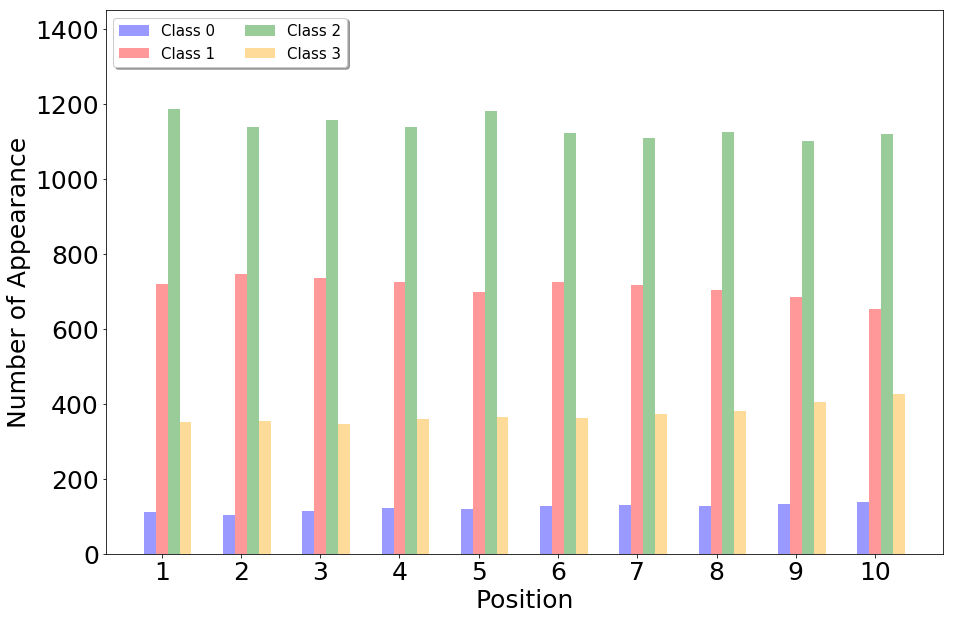

In [22]:
fig0, ax0 = plt.subplots(figsize=(15,10))
bar_width = 0.15
opacity = 0.4
error_config = {'ecolor': '0.3'}
r0 = ax0.bar(x_axis0,zero,bar_width,alpha=opacity,color ='blue',error_kw = error_config,label = 'Class 0')
r1 = ax0.bar(x_axis1,one,bar_width,alpha=opacity,color ='red',error_kw = error_config,label = 'Class 1')
r2 = ax0.bar(x_axis2,two,bar_width,alpha=opacity,color ='green',error_kw = error_config,label = 'Class 2')
r3 = ax0.bar(x_axis3,three,bar_width,alpha=opacity,color ='orange',error_kw = error_config,label = 'Class 3')
#ax0.set_xticks(np.arange(1, 11, 1.0))
#ax0.legend()

ax0.set_xticks(np.arange(1, 11, 1.0))
ax0.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True, prop={'size': 15})
ax0.set_ylim(0, 1450)
ax0.set_xlabel('Position', size = 25)
ax0.set_ylabel('Number of Appearance', size = 25)
ax0.tick_params(labelsize=25)

plt.show()

In [23]:
weighted_0 = zero/3
weighted_1 = one/10
weighted_2 = two/3
weighted_3 = three/4

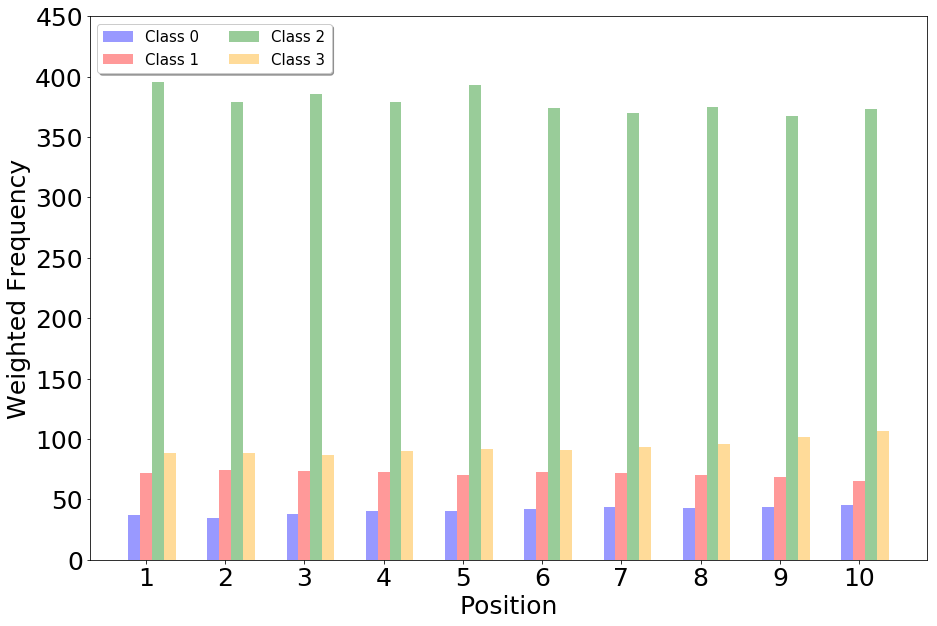

In [24]:
fig0, ax0 = plt.subplots(figsize=(15,10))
bar_width = 0.15
opacity = 0.4
error_config = {'ecolor': '0.3'}
r0 = ax0.bar(x_axis0,weighted_0,bar_width,alpha=opacity,color ='blue',error_kw = error_config,label = 'Class 0')
r1 = ax0.bar(x_axis1,weighted_1,bar_width,alpha=opacity,color ='red',error_kw = error_config,label = 'Class 1')
r2 = ax0.bar(x_axis2,weighted_2,bar_width,alpha=opacity,color ='green',error_kw = error_config,label = 'Class 2')
r3 = ax0.bar(x_axis3,weighted_3,bar_width,alpha=opacity,color ='orange',error_kw = error_config,label = 'Class 3')
ax0.set_xticks(np.arange(1, 11, 1.0))
ax0.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True, prop={'size': 15})
ax0.set_ylim(0, 450)
ax0.set_xlabel('Position', size = 25)
ax0.set_ylabel('Weighted Frequency', size = 25)
ax0.tick_params(labelsize=25)

plt.show()

In [25]:
def soltoinsol2(array):
    num = len(array[0])
    AAnumlist=[]
    for i in range(len(array)):
        stringNUM = ''
        for j in range(0,num):
            AAstr = array[i]
            
            AA = AAstr[j]
            if AA == 'A' or AA =='R' or AA == "G":
                #10-100
                stringNUM += "0"
            elif AA == 'V' or AA == 'S' or AA == 'W' or AA == 'F' or AA == 'M' or AA == 'L' or AA == 'I' or AA == 'H' or AA == 'Q' or AA == 'N':
                #1-10
                stringNUM += '3'
            elif AA == 'C' or AA == 'K'or AA == 'P' or AA == 'T':
                #100 and above
                stringNUM += '1'
            elif AA =='Y' or AA == 'E' or AA =='D':
                #less than 1
                stringNUM += '2'
        if len(stringNUM) == num:
            AAnumlist.append(stringNUM) 
    
    return AAnumlist


            

In [26]:
insol_num_slice_array10_2 = soltoinsol2(slice_array10)
insol_num_slice_array10_2[0:10]


['1232332321',
 '3231133331',
 '1333030031',
 '1000312000',
 '3330031311',
 '0333333333',
 '2300110302',
 '3303331110',
 '2331301133',
 '2113110011']

In [27]:
def remove_even_distribution(inputarray):
    
    new_ls = inputarray
    num = len(inputarray[0])
    half = num // 2
    for i in range(len(inputarray)):
        stringNUM = ''
        count0_0 = 0
        count0_1 = 0
        count1_0 = 0
        count1_1 = 0
        for j in range(0,half):
            if j == '1' or j == '0':
                count0_0 += 1
            else:
                count0_1 += 1
        for k in range(half,num):
            if k=='1' or k =='0':
                count1_0 += 1
                count1_1 += 1
        if np.abs(count0_0 - count0_1) == 0 or np.abs(count0_0 - count0_1) == 1 or np.abs(count1_0 - count1_1) == 0 or np.abs(count1_0 - count1_1) == 1:
            if i in new_ls:
                new_ls.remove(i)
            
        
    return new_ls
            

In [28]:
reinsol_num_slice_array10_2 = remove_even_distribution(insol_num_slice_array10_2 )
np.shape(reinsol_num_slice_array10_2 )

(1775,)

In [29]:
inzero , inone , intwo , inthree = checkfreq(insol_num_slice_array10_2)

In [30]:
inweighted_0 = inzero/3
inweighted_1 = inone/10
inweighted_2 = intwo/3
inweighted_3 = inthree/4
inweighted_3

array([179.75, 186.75, 184.  , 181.25, 174.75, 181.  , 179.25, 175.75,
       171.5 , 163.25])

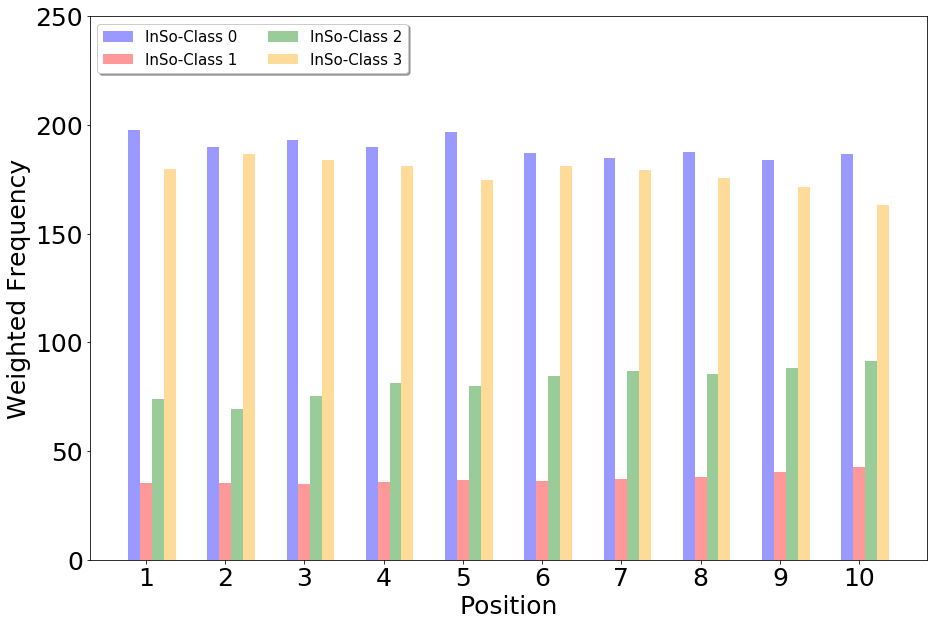

In [32]:
fig1, ax1 = plt.subplots(figsize=(15,10))
bar_width = 0.15
opacity = 0.4
error_config = {'ecolor': '0.3'}
inr0 = ax1.bar(x_axis0,inweighted_0,bar_width,alpha=opacity,color ='blue',error_kw = error_config,label = 'InSo-Class 0')
inr1 = ax1.bar(x_axis1,inweighted_1,bar_width,alpha=opacity,color ='red',error_kw = error_config,label = 'InSo-Class 1')
inr2 = ax1.bar(x_axis2,inweighted_2,bar_width,alpha=opacity,color ='green',error_kw = error_config,label = 'InSo-Class 2')
inr3 = ax1.bar(x_axis3,inweighted_3,bar_width,alpha=opacity,color ='orange',error_kw = error_config,label = 'InSo-Class 3')
ax1.set_xticks(np.arange(1, 11, 1.0))
ax1.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True, prop={'size': 15})
ax1.set_ylim(0, 250)
ax1.set_xlabel('Position', size = 25)
ax1.set_ylabel('Weighted Frequency', size = 25)
ax1.tick_params(labelsize=25)

plt.show()

In [36]:
mean0=weighted_0.mean()
sig0 = np.sqrt(weighted_0.var())
mean1=weighted_1.mean()
sig1 = np.sqrt(weighted_1.var())
mean2=weighted_2.mean()
sig2 = np.sqrt(weighted_2.var())
mean3=weighted_3.mean()
sig3 = np.sqrt(weighted_3.var())


inmean0=inweighted_0.mean()
insig0 = np.sqrt(inweighted_0.var())
inmean1=inweighted_1.mean()
insig1 = np.sqrt(inweighted_1.var())
inmean2=inweighted_2.mean()
insig2 = np.sqrt(inweighted_2.var())
inmean3=inweighted_3.mean()
insig3 = np.sqrt(inweighted_3.var())

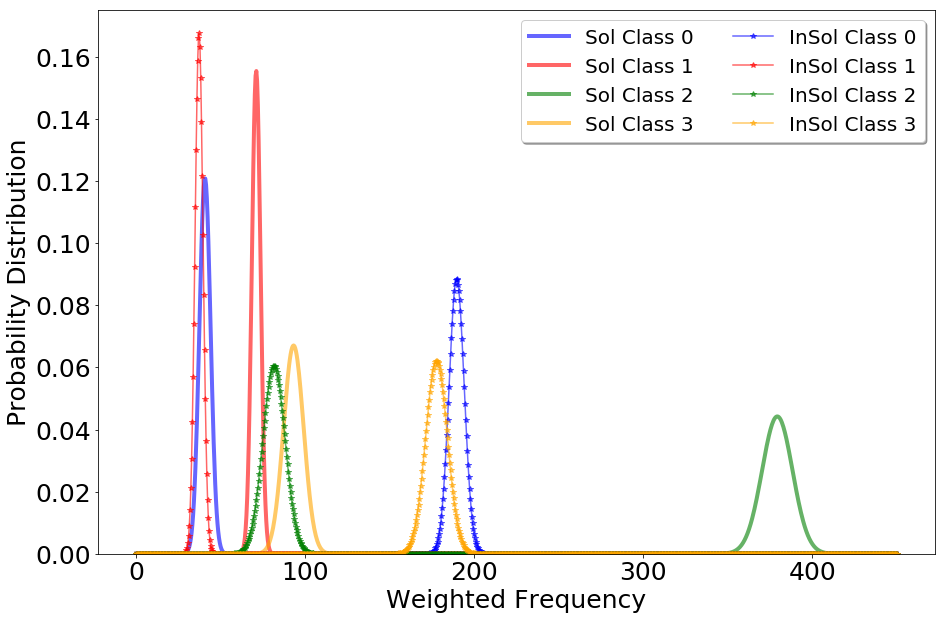

In [37]:
fig2, ax2 = plt.subplots(figsize=(15,10))

x = np.linspace(0,450,1000)
ax2.plot(x,stats.norm.pdf(x,mean0,sig0),color = 'blue',alpha=0.6,linewidth=4,label ='Sol Class 0')
ax2.plot(x,stats.norm.pdf(x,mean1,sig1),color = 'red',alpha=0.6,linewidth=4,label ='Sol Class 1')
ax2.plot(x,stats.norm.pdf(x,mean2,sig2),color = 'green',alpha=0.6,linewidth=4,label ='Sol Class 2')
ax2.plot(x,stats.norm.pdf(x,mean3,sig3),color = 'orange',alpha=0.6,linewidth=4,label ='Sol Class 3')


ax2.plot(x,stats.norm.pdf(x,inmean0,insig0),color = 'blue',alpha=0.6,marker= '*',label ='InSol Class 0')
ax2.plot(x,stats.norm.pdf(x,inmean1,insig1),color = 'red',alpha=0.6,marker= '*',label ='InSol Class 1')
ax2.plot(x,stats.norm.pdf(x,inmean2,insig2),color = 'green',alpha=0.6,marker= '*',label ='InSol Class 2')
ax2.plot(x,stats.norm.pdf(x,inmean3,insig3),color = 'orange',alpha=0.6,marker= '*',label ='InSol Class 3')
ax2.set_ylim(0.000, 0.175)
ax2.tick_params(labelsize=25)
ax2.legend(loc="upper right",
           ncol=2, shadow=True, fancybox=True, prop={'size': 20})
ax2.set_ylabel('Probability Distribution', size = 25)
ax2.set_xlabel('Weighted Frequency', size = 25)

plt.show()

In [38]:
def listtondarray(oddlist):
    ar_list = []
    for i in oddlist:
        temp = []
        
        for digit in i:
            
            temp.append(int(digit))
        
        ar_list.append(temp)
    
    y=np.array([np.array(xi) for xi in ar_list])
    
    return y

In [39]:
sol_10_2 = listtondarray(num_slice_array10_2)
np.shape(sol_10_2)


(1775, 10)

In [43]:
insol_10_2 = listtondarray(insol_num_slice_array10_2)


In [44]:
sol_target = np.ones((1775,1))
sol_target
insol_target = np.zeros((1775,1))
insol_target

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [45]:
comb_10 = np.concatenate([sol_10_2,insol_10_2], axis = 0)
comb_tg_10 = np.concatenate([sol_target,insol_target], axis = 0)

In [46]:
#np.random.seed(1)
shuffle_index = np.random.permutation(3550)
ran_comb_10, ran_comb_tg_10 = comb_10[shuffle_index], comb_tg_10[shuffle_index]
x_10_train,x_10_test,y_10_train,y_10_test = ran_comb_10[:3200],ran_comb_10[3200:], ran_comb_tg_10[:3200],ran_comb_tg_10[3200:]

In [48]:
#### Neural Network Start Here

In [49]:
from sklearn.neural_network import MLPClassifier

In [50]:
np.random.seed(1)
shuffle_index = np.random.permutation(3550)
ran_comb_10, ran_comb_tg_10 = comb_10[shuffle_index], comb_tg_10[shuffle_index]
x_10_train,x_10_test,y_10_train,y_10_test = ran_comb_10[:3200],ran_comb_10[3200:], ran_comb_tg_10[:3200],ran_comb_tg_10[3200:]
y_10_train = y_10_train.ravel()
y_10_test = y_10_test.ravel()


In [51]:
ddclf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ddclf.fit(x_10_train, y_10_train.ravel())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [55]:
def nn(train,train_tg,test,test_tg,hdlsize_tuple):
    coll = []
    ddclf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=hdlsize_tuple, random_state=1)
    ddclf.fit(train, train_tg)
    
    scores = cross_val_score(ddclf,x_10_train, y_10_train.ravel(),cv=5)
    mean_score = scores.mean()
    print(hdlsize_tuple,mean_score)
    coll.append(mean_score)
    return coll
    

In [56]:
single_layer = [(i,) for i in range(1,101)]
double_layer = [(i,j) for i in range(1,50) for j in range(1,50)]
triple_layer = [(i,j,k) for i in range (1,11) for j in range(1,11) for k in range(1,11)]

In [57]:
for i in single_layer:
    coll = nn(x_10_train,y_10_train,x_10_test,y_10_test,i)

(1,) 0.4996865226721745
(2,) 0.7043727600042969
(3,) 0.7000158394246568
(4,) 0.7537468215864787
(5,) 0.7943625831300858
(6,) 0.6856198196284659
(7,) 0.7581281913835239
(8,) 0.8318655631788652
(9,) 0.8274978759713768
(10,) 0.8084382965107336
(11,) 0.8474891097756586
(12,) 0.8368601913090608
(13,) 0.8615501487430389
(14,) 0.8656136420926321
(15,) 0.8593685081323441
(16,) 0.8724935218652877
(17,) 0.8465511268338057
(18,) 0.8621771049245724
(19,) 0.859361679807568
(20,) 0.8606209564110264
(21,) 0.869366570261402
(22,) 0.8593650863405429
(23,) 0.8668690124365538
(24,) 0.8609236953398323
(25,) 0.8684324966308512
(26,) 0.8684271247610468
(27,) 0.8718690185400844
(28,) 0.8687405982741657
(29,) 0.8743719406053237
(30,) 0.872491570261402
(31,) 0.873747929377269
(32,) 0.8687420623585507
(33,) 0.873736692014629
(34,) 0.8706180419752002
(35,) 0.8681243888840061
(36,) 0.8696810279688183
(37,) 0.8718592559430076
(38,) 0.8743690231177321
(39,) 0.8731112105986586
(40,) 0.8803006713578403
(41,) 0.874369

In [172]:
accuracy = []
for i in double_layer:
    coll = nn(x_10_train,y_10_train,x_10_test,y_10_test,i)
    

(1, 1) 0.5003125007629413
(1, 2) 0.4996875007629413
(1, 3) 0.5924780623854062
(1, 4) 0.5237866791666972
(1, 5) 0.5003125007629413
(1, 6) 0.5275000007629413
(1, 7) 0.6059351776066348
(1, 8) 0.5000000007629414
(1, 9) 0.5840694267442058
(1, 10) 0.6081231651261355
(1, 11) 0.5909419555772841
(1, 12) 0.5981270713856723
(1, 13) 0.4996875007629413
(1, 14) 0.6124834922387505
(1, 15) 0.5681646134389976
(1, 16) 0.61033017353558
(1, 17) 0.6062452461126614
(1, 18) 0.5743457968952561
(1, 19) 0.4996875007629413
(1, 20) 0.6152969718554001
(1, 21) 0.5787281203689463
(1, 22) 0.4996875007629413
(1, 23) 0.5000000007629414
(1, 24) 0.4996875007629413
(1, 25) 0.5924937316741496
(1, 26) 0.5878257629718334
(1, 27) 0.619045998342281
(1, 28) 0.5793716491617411
(1, 29) 0.6021797736932951
(1, 30) 0.5490444778002388
(1, 31) 0.5131250007629413
(1, 32) 0.5947007828083077
(1, 33) 0.5993736587491669
(1, 34) 0.5640777313604282
(1, 35) 0.4996875007629413
(1, 36) 0.5000000007629414
(1, 37) 0.6037325233032795
(1, 38) 0.500

(7, 14) 0.8206174918945115
(7, 15) 0.8056291832072343
(7, 16) 0.8353054961987212
(7, 17) 0.8334422103996836
(7, 18) 0.8359310005029309
(7, 19) 0.8312449462767242
(7, 20) 0.8265623214717321
(7, 21) 0.8346853897043205
(7, 22) 0.834058428945139
(7, 23) 0.8290550025756899
(7, 24) 0.8368660491724833
(7, 25) 0.8190642608685568
(7, 26) 0.8224983528096992
(7, 27) 0.8296926979191843
(7, 28) 0.832809893029524
(7, 29) 0.8234363464327306
(7, 30) 0.8378084335227868
(7, 31) 0.8334275665040686
(7, 32) 0.8306209319969042
(7, 33) 0.8259304900951905
(7, 34) 0.8293816604776867
(7, 35) 0.8334373336787932
(7, 36) 0.8474935020288136
(7, 37) 0.8312390792580059
(7, 38) 0.8406219085617884
(7, 39) 0.8362532463152986
(7, 40) 0.8306194541795756
(7, 41) 0.8434300117309859
(7, 42) 0.8240564651341922
(7, 43) 0.8315657447894159
(7, 44) 0.836252749640502
(7, 45) 0.834997393029524
(7, 46) 0.8459436943205427
(7, 47) 0.845932460009668
(7, 48) 0.8371844009323752
(7, 49) 0.8337512916596477
(8, 1) 0.82562189788061
(8, 2) 0.

(13, 21) 0.8490584350486696
(13, 22) 0.8559363800021484
(13, 23) 0.8587483863791171
(13, 24) 0.8553045394703112
(13, 25) 0.8549930129834301
(13, 26) 0.8568699706908465
(13, 27) 0.8615589378269967
(13, 28) 0.8537439819189011
(13, 29) 0.8596780860671046
(13, 30) 0.8453103866525552
(13, 31) 0.8549944846972283
(13, 32) 0.852487149016477
(13, 33) 0.8524959442039654
(13, 34) 0.8590564941259622
(13, 35) 0.8671800376709904
(13, 36) 0.8528069755419324
(13, 37) 0.8368670089526585
(13, 38) 0.858115093969956
(13, 39) 0.8578113891574443
(13, 40) 0.8562312896271719
(13, 41) 0.8553074676390813
(13, 42) 0.8593655814894567
(13, 43) 0.8699920577809028
(13, 44) 0.8587498504635022
(13, 45) 0.8593758209248558
(13, 46) 0.8587410644313096
(13, 47) 0.8428103881784379
(13, 48) 0.8606214408787618
(13, 49) 0.8603069846972282
(14, 1) 0.8446824569579027
(14, 2) 0.8390594116135539
(14, 3) 0.8293704353221077
(14, 4) 0.8515540382178667
(14, 5) 0.854053562905427
(14, 6) 0.8228152603216804
(14, 7) 0.8578060020288136
(1

(19, 23) 0.8706229049631469
(19, 24) 0.8653089439305273
(19, 25) 0.8687449798461422
(19, 26) 0.8640604064890296
(19, 27) 0.8721761314114536
(19, 28) 0.8603006362625397
(19, 29) 0.8665564941259621
(19, 30) 0.8634231910356226
(19, 31) 0.8687327689703832
(19, 32) 0.8646756316848917
(19, 33) 0.8715574737426117
(19, 34) 0.8562454414256383
(19, 35) 0.8606219222947322
(19, 36) 0.8606194877489936
(19, 37) 0.8581233833273518
(19, 38) 0.8628025802370123
(19, 39) 0.8678128471382985
(19, 40) 0.8674944892748762
(19, 41) 0.8728050391968729
(19, 42) 0.864362656372452
(19, 43) 0.868432467639081
(19, 44) 0.8687435066064614
(19, 45) 0.8662444877489935
(19, 46) 0.8656170470997242
(19, 47) 0.8684314987036101
(19, 48) 0.8731150985476038
(19, 49) 0.8643724143918808
(20, 1) 0.5003125007629413
(20, 2) 0.8531185020288137
(20, 3) 0.8668699767943769
(20, 4) 0.8681165550025757
(20, 5) 0.8524944846972282
(20, 6) 0.8565589393528793
(20, 7) 0.8531258193989733
(20, 8) 0.8540525802370122
(20, 9) 0.8634285568018966
(20

(25, 25) 0.8634344329759106
(25, 26) 0.8618685111841092
(25, 27) 0.8721815017553753
(25, 28) 0.8678060096582267
(25, 29) 0.8631165488990451
(25, 30) 0.8690638298067135
(25, 31) 0.8653040595802235
(25, 32) 0.8674954749950562
(25, 33) 0.8684329612621126
(25, 34) 0.8696844345017933
(25, 35) 0.8690569908007589
(25, 36) 0.8612444785936978
(25, 37) 0.8734349220212939
(25, 38) 0.8643689971777274
(25, 39) 0.8784310172876397
(25, 40) 0.8659388160737699
(25, 41) 0.8649974204954114
(25, 42) 0.8615584518333785
(25, 43) 0.8612478973337339
(25, 44) 0.8681219299241454
(25, 45) 0.868747414391881
(25, 46) 0.8709300376709905
(25, 47) 0.866865572334161
(25, 48) 0.864685400385499
(25, 49) 0.8662410598536617
(26, 1) 0.5003125007629413
(26, 2) 0.5000004882824421
(26, 3) 0.8578065017553754
(26, 4) 0.8618733833273519
(26, 5) 0.8699905860671047
(26, 6) 0.865618991074197
(26, 7) 0.8621775909181908
(26, 8) 0.8662459518333785
(26, 9) 0.82750909197166
(26, 10) 0.8621858924826477
(26, 11) 0.8690638221773002
(26, 12

(31, 27) 0.8703069923266413
(31, 28) 0.8649979019113816
(31, 29) 0.8656258377095647
(31, 30) 0.8637376563724521
(31, 31) 0.8637449783202594
(31, 32) 0.8678099189695286
(31, 33) 0.8696917549237181
(31, 34) 0.8656229064890295
(31, 35) 0.8699998626705632
(31, 36) 0.871549665801186
(31, 37) 0.8637439956518449
(31, 38) 0.8684363937350922
(31, 39) 0.8656219253464975
(31, 40) 0.867494486223111
(31, 41) 0.8599900832887777
(31, 42) 0.8671888206514176
(31, 43) 0.8771815063330232
(31, 44) 0.8646892974897401
(31, 45) 0.8662444908007588
(31, 46) 0.8678064910741969
(31, 47) 0.8646785659571924
(31, 48) 0.8699954673656428
(31, 49) 0.8671805236646085
(32, 1) 0.8637449737426117
(32, 2) 0.8718694862231109
(32, 3) 0.49906347580194294
(32, 4) 0.8709305282422566
(32, 5) 0.8662386283596885
(32, 6) 0.8621839332493488
(32, 7) 0.8665555206128432
(32, 8) 0.8674993644698838
(32, 9) 0.8568650863405429
(32, 10) 0.8653074706908465
(32, 11) 0.867804058054341
(32, 12) 0.8643670394703111
(32, 13) 0.861861172451593
(32,

(37, 29) 0.8656155769118088
(37, 30) 0.873430039196873
(37, 31) 0.8706180251904911
(37, 32) 0.8646800376709904
(37, 33) 0.8718665595802235
(37, 34) 0.8706180267163738
(37, 35) 0.871239112827424
(37, 36) 0.8656165565284584
(37, 37) 0.8715599250730592
(37, 38) 0.8659295547291375
(37, 39) 0.8706189971777274
(37, 40) 0.8731170562550201
(37, 41) 0.8659295516773723
(37, 42) 0.874050639314305
(37, 43) 0.8724954688915256
(37, 44) 0.8681146018728073
(37, 45) 0.8746780845412221
(37, 46) 0.8762425407227556
(37, 47) 0.8671849204954114
(37, 48) 0.8637415534766932
(37, 49) 0.8640589332493487
(38, 1) 0.5003125007629413
(38, 2) 0.5000000007629414
(38, 3) 0.8656190063330232
(38, 4) 0.8696785720607227
(38, 5) 0.8696849204954115
(38, 6) 0.8659329566844646
(38, 7) 0.8687381332107744
(38, 8) 0.8634261176785101
(38, 9) 0.8628064941259623
(38, 10) 0.8693685157617572
(38, 11) 0.8653045409961939
(38, 12) 0.8678030799635741
(38, 13) 0.862491062905427
(38, 14) 0.8662430160351955
(38, 15) 0.8659329566844646
(38, 

(43, 32) 0.8721854095407947
(43, 33) 0.8653113784762659
(43, 34) 0.8796810172876398
(43, 35) 0.8718714378269965
(43, 36) 0.8674993659957666
(43, 37) 0.8674900893923081
(43, 38) 0.8737474296507072
(43, 39) 0.8743699828979075
(43, 40) 0.8696810066064614
(43, 41) 0.872804540996194
(43, 42) 0.8649978988596162
(43, 43) 0.8734280921706352
(43, 44) 0.8746883316060341
(43, 45) 0.8703050330933426
(43, 46) 0.8678133316060341
(43, 47) 0.8696771049245726
(43, 48) 0.8718646049245725
(43, 49) 0.87311899870361
(44, 1) 0.8674949798461423
(44, 2) 0.8659271079763379
(44, 3) 0.8693753486641812
(44, 4) 0.8703069831713457
(44, 5) 0.8659373535152675
(44, 6) 0.8718670486256069
(44, 7) 0.8696834533592611
(44, 8) 0.8684315048071406
(44, 9) 0.8725023078974802
(44, 10) 0.8724954612621124
(44, 11) 0.8681165611061061
(44, 12) 0.855612153594125
(44, 13) 0.8681233894308823
(44, 14) 0.8703055282422565
(44, 15) 0.8693738845797963
(44, 16) 0.8687469283982626
(44, 17) 0.8721815002294928
(44, 18) 0.8671761253079232
(44, 

(49, 34) 0.8678045516773724
(49, 35) 0.8703089439305272
(49, 36) 0.8731189956518449
(49, 37) 0.8771819953784068
(49, 38) 0.8674930175610779
(49, 39) 0.8762454704174083
(49, 40) 0.8687474204954114
(49, 41) 0.8715604095407947
(49, 42) 0.8721780799635741
(49, 43) 0.8743704688915257
(49, 44) 0.869050634736657
(49, 45) 0.8684295501514896
(49, 46) 0.8699954643138778
(49, 47) 0.8737464454564098
(49, 48) 0.8715560020288136
(49, 49) 0.8709319938525241


In [242]:
fix_42_triple = [(42,23,j) for j in range(1,51)]
accuracy = []
for i in fix_42_triple:
    coll = nn(x_10_train,y_10_train,x_10_test,y_10_test,i)
    accuracy.append(coll)

(42, 23, 1) 0.8693699706908464
(42, 23, 2) 0.5688571017019084
(42, 23, 3) 0.8718714439305272
(42, 23, 4) 0.8706199813720248
(42, 23, 5) 0.8628103988596163
(42, 23, 6) 0.8646790519508105
(42, 23, 7) 0.8709300391968731
(42, 23, 8) 0.8715545516773723
(42, 23, 9) 0.866864120456837
(42, 23, 10) 0.8637376487430387
(42, 23, 11) 0.8674910735866053
(42, 23, 12) 0.8665521018728073
(42, 23, 13) 0.8674979049631469
(42, 23, 14) 0.8718665595802235
(42, 23, 15) 0.8618685096582268
(42, 23, 16) 0.8728040565284584
(42, 23, 17) 0.8703055221387259
(42, 23, 18) 0.870928084541222
(42, 23, 19) 0.8656224113401155
(42, 23, 20) 0.8768734092673567
(42, 23, 21) 0.8712410659571923
(42, 23, 22) 0.8653016113015412
(42, 23, 23) 0.868742044047959
(42, 23, 24) 0.8659305175610781
(42, 23, 25) 0.8696858909567651
(42, 23, 26) 0.8737415550025757
(42, 23, 27) 0.8668675346192252
(42, 23, 28) 0.8756141219827196
(42, 23, 29) 0.8753094314500279
(42, 23, 30) 0.8724915626319889
(42, 23, 31) 0.8721815093847886
(42, 23, 32) 0.87499

Detecting the portion of aggregation in calcitonin sequence

In [188]:
hcalcitonin = ['CGNLSTCMLGTYTQDFNKFHTFPQTAIGVGAP']
scalcitonin = ['CSNLSTCVLGKLSQELHKLQTYPRTNTGSGTP']

In [201]:
s_hc = sliceppt(hcalcitonin,10)
s_sc = sliceppt(scalcitonin,10)
s_hc

['FPQTAIGVGA',
 'LSTCMLGTYT',
 'MLGTYTQDFN',
 'KFHTFPQTAI',
 'NLSTCMLGTY',
 'STCMLGTYTQ',
 'CMLGTYTQDF',
 'TQDFNKFHTF',
 'HTFPQTAIGV',
 'TCMLGTYTQD',
 'DFNKFHTFPQ',
 'CGNLSTCMLG',
 'YTQDFNKFHT',
 'LGTYTQDFNK',
 'GNLSTCMLGT',
 'FNKFHTFPQT',
 'PQTAIGVGAP',
 'TYTQDFNKFH',
 'TFPQTAIGVG',
 'NKFHTFPQTA',
 'QDFNKFHTFP',
 'GTYTQDFNKF',
 'FHTFPQTAIG']

In [192]:
s_hc_num = AAtoNUM_2(s_hc)
s_sc_num = AAtoNUM_2(s_sc)

In [ ]:
def listtondarray(oddlist):
    ar_list = []
    for i in oddlist:
        temp = []
        
        for digit in i:
            
            temp.append(int(digit))
        
        ar_list.append(temp)
    
    y=np.array([np.array(xi) for xi in ar_list])
    
    return y

In [232]:
s_hc_num = listtondarray(s_hc_num)
s_sc_num = listtondarray(s_sc_num)
np.shape(s_sc_num)

(23, 10)

In [237]:
test_ddclf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(42, 23), random_state=1)
test_ddclf.fit(x_10_train, y_10_train.ravel())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(42, 23), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [238]:
y_s_hc_num = test_ddclf.predict(s_hc_num)

In [239]:
y_s_sc_num = test_ddclf.predict(s_sc_num)

In [240]:
y_s_hc_num

array([1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1.])

In [241]:
y_s_sc_num

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1.])